# Remove false positives from low metallicity stars

Low metallicity stars are amenable to model subtraction and residual search, but are not an ideal target because the catalog is not tailored to metal poor stars
Metal poor stars have shallower absorption features; thus, the model that SM chooses will over subtract, resulting in a false positive emission line.

Two stars in our final pool of candidates are metal poor with metallicities under -0.3, according to SM synthetic.

HIP7760: -0.42

HIP68030: -0.35

This eliminates 21 events.

# Plots for Paper

In [64]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import astropy.io.fits as fits
from glob import glob

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 19})

plt.rcParams["figure.figsize"] = (12,7.5)

directory = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/6sResults/'
persistent_residuals = pd.read_csv(directory + 'r_persistent_events.csv')


# plt.fig(dpi=300)

# plt.savefig(figdir+'Prot_noyes_david_4teff.png', 
#             format='png', dpi=300, facecolor="w")#,

In [41]:
# star = 'HIP68030'
# persistent_residuals[persistent_residuals['star'] == star]

In [42]:
observed_wl = 5205.464030
rest_wl = 5405.936025

In [43]:
apf_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/apf_data_files/'
observed_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/observed_data_files/'
rest_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/rest_data_files/'
resid_directory = '/home/zoek/code/APF-BL-DAP/Zoe/FinalVetting/resid_data_files/'

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl_image = wl_file[0].data

apf_files = np.load(apf_directory + star + '.npy')
observed_files = np.load(observed_directory + star + '.npy')
rest_files = np.load(rest_directory + star + '.npy')
resid_files = np.load(resid_directory + star + '.npy')

arr = np.round(wl_image, 1) == np.round(observed_wl, 1)
order = np.where(arr)[0][0]

# Plot for Paper

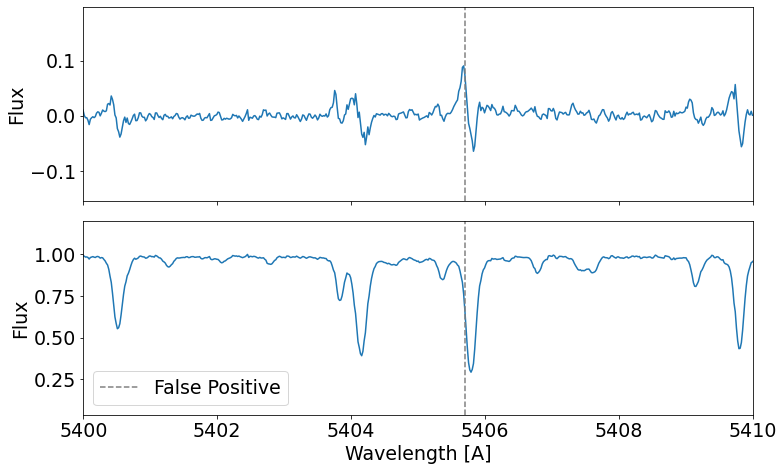

HIP68030


In [65]:
for file in resid_files:
    subfile = fits.open(file)
    flux = subfile[1].data
    wl = subfile[2].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    if 'HIP68030_8_NDRR.fits' in file:
        # plt.axvline(rest_wl - .25, ls='--', color='gray', label='False Positive')
        resid_wl = wl
        resid_fl = flux

for file in rest_files:
    if 'HIP68030_8_NDRS.fits' in file:
        if 'NDRR' in file:
            print('skipped')
            continue
        subfile = fits.open(file)
        flux = subfile[0].data
        wl = subfile[1].data

        header = subfile[0].header
        star = header['TOBJECT']
        date = header['DATE-OBS']

        # plt.axvline(rest_wl - .12, ls='--', color='gray', label='False Positive')
    
        

fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=.1)

axs[0].plot(resid_wl, resid_fl)
axs[0].axvline(rest_wl - 0.24, ls='--', color='gray', label='False Positive')
# axs[0].set_ylim(-0.2, 0.2)
# axs[0].set_yticks(np.arange(-0.2, 0.2, 0.15))
axs[0].set_ylabel('Flux')

axs[1].plot(wl, flux)
axs[1].axvline(rest_wl - 0.24, ls='--', color='gray', label='False Positive')
# axs[1].set_ylim(0, 1.1)
# axs[1].set_yticks(np.arange(0, 1.2, 0.4))
axs[1].set_ylabel('Flux')

plt.xlim(5400, 5410)
plt.xlabel('Wavelength [A]')
plt.legend()

# # Plot 1:
# fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(left=0.2, wspace=0.6)
# make_plot(axs)

# just align the last column of axes:
fig.align_ylabels(axs[0])
plt.show()

plt.show()
print(star)

## Plot SM residuals in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_ind/HIP68030_8_NDRR.fits
HIP68030
2020-06-05T05:45:14.14


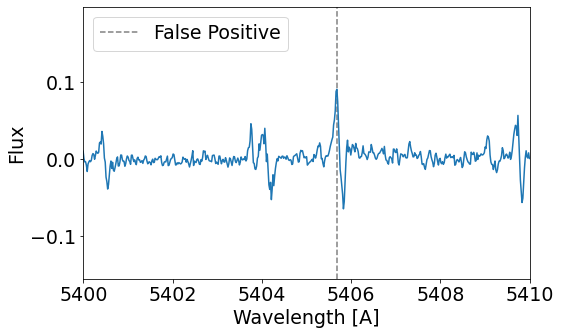

In [37]:
for file in resid_files:
    subfile = fits.open(file)
    flux = subfile[1].data
    wl = subfile[2].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    if 'HIP68030_8_NDRR.fits' in file:
        print(file)
        print(star)
        print(date)
        plt.axvline(rest_wl - .25, ls='--', color='gray', label='False Positive')
        plt.plot(wl, flux)
        plt.xlim(5400, 5410)
        # plt.ylim(-.15, .15)
        plt.xlabel('Wavelength [A]')
        plt.ylabel('Flux')
        plt.legend()
        # plt.title('Residual')
        plt.show()

## Plot SM spectra in rest frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRS_ind/HIP68030_8_NDRS.fits
HIP68030
2020-06-05T05:45:14.14


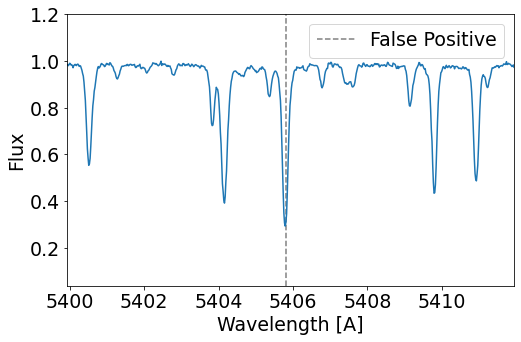

In [39]:
for file in rest_files:
    if 'HIP68030_8_NDRS.fits' in file:
        if 'NDRR' in file:
            print('skipped')
            continue
        subfile = fits.open(file)
        flux = subfile[0].data
        wl = subfile[1].data

        header = subfile[0].header
        star = header['TOBJECT']
        date = header['DATE-OBS']
        print(file)
        print(star)
        print(date)
        plt.axvline(rest_wl - .12, ls='--', color='gray', label='False Positive')
        plt.plot(wl, flux)
        plt.xlim(rest_wl - 6, rest_wl + 6)
        # plt.title('SM Rest Frame Spectrum')
        plt.xlabel('Wavelength [A]')
        plt.ylabel('Flux')
        plt.legend()
        plt.show()

## Plot SM spectra in observed frame

/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP36152_0_NDRU.fits
HIP36152
2018-03-28T04:47:50.21


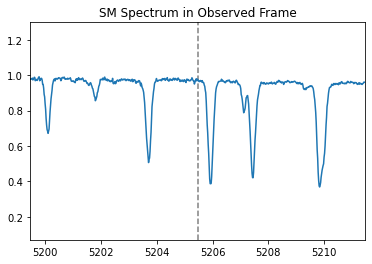

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP36152_4_NDRU.fits
HIP36152
2018-03-28T04:53:43.72


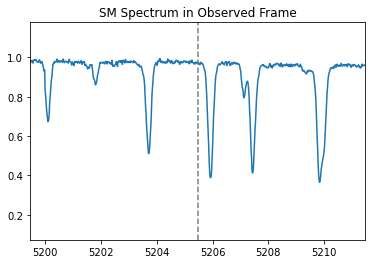

5899.98996409431
5000.005552883154
/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRU_ind/HIP36152_5_NDRU.fits
HIP36152
2018-03-28T04:59:34.30


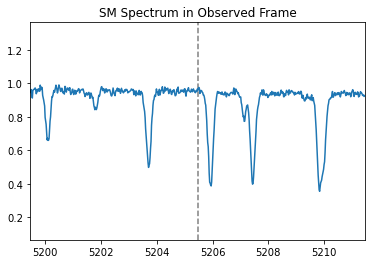

5899.98996409431
5000.005552883154


In [7]:
for file in observed_files:
    if 'NDRR' in file:
        continue
    subfile = fits.open(file)
    flux = subfile[0].data
    wl = subfile[1].data
    
    header = subfile[0].header
    star = header['TOBJECT']
    date = header['DATE-OBS']
    print(file)
    print(star)
    print(date)
    plt.axvline(observed_wl, ls='--', color='gray')
    plt.plot(wl, flux)
    plt.xlim(observed_wl - 6, observed_wl + 6)
    # plt.title('SM Spectrum in Observed Frame')
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux')
    plt.show()
    print(max(wl))
    print(min(wl))

## Plot all the APF plots

HIP36152
2018-03-28T04:47:50.21
/datag/blpd0/datax/apf/rbdq.206.fits


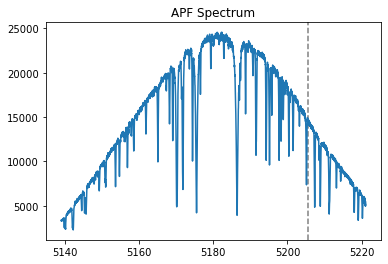

HIP36152
2018-03-28T04:53:43.72
/datag/blpd0/datax/apf/rbdq.207.fits


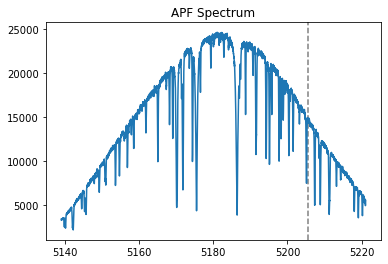

HIP36152
2018-03-28T04:59:34.30
/datag/blpd0/datax/apf/rbdq.208.fits


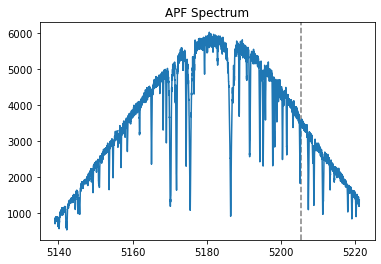

In [8]:
for file in apf_files:
    fl_file = fits.open(file)
    obj = fl_file[0].header['TOBJECT']
    date = fl_file[0].header['DATE-OBS']
    print(obj)
    print(date)
    print(file)
    fl_image = fl_file[0].data
    flux = fl_image[order][:-1]
    wl = wl_image[order]
    plt.axvline(observed_wl, ls = '--', color='gray')
    plt.plot(wl, flux)
#     plt.ylim(14000, 15000)
    # plt.xlim(observed_wl - 6, observed_wl + 6)
    plt.title('APF Spectrum')
    plt.show()